In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First let us import the data from the attached csv file.

In [2]:
csu = pd.read_csv('csu.csv')

We focus on the following features:

- `Close`: The price of one share at the time the market closes.
- `High`: The maximum share price in a given day.
- `Low`: The minimum share price in a given day
- `Open`: The price of one share at the time the market opens.
- `Volume`: The number of share traded in a given day.
- `Log Returns`: The logarithms of the quotient between the closing prices on the present day and the previous day.
- `High - Low`: The difference between `High` and `Low`.
- `Open - Close`: The difference between `Open` and `Close`.
- `d-day Momentum`: The difference in the closing prices on the present day and $d$ days ago.
- `d-day Moving Average`: The average closing share price calculated using information from the last $d$ days.
- `d-day Volatility`: The volatility of the closing share prices calculated 
using information from the last $d$ days.
- `d-day Quarter Upper Band`: One quarter of the upper Bollinger band calculated using information from the last $d$ days.

Where we use $d = 5, 10, 20$ days.

In [3]:
csu["Log Returns"] = np.log(csu["Close"]/csu["Close"].shift(1))
csu["High-Low"] = csu["High"]- csu["Low"]
csu["Open-Close"] = csu["Open"] - csu["Close"]
csu["5d Momentum"] = csu["Close"] - csu["Close"].shift(5)
csu["5d Moving Average"] = csu["Close"].rolling(5).mean()
csu["5d Rolling Volatility"] = csu["Close"].rolling(5).std()
csu["5d Quarter Upper Band"] = csu["5d Moving Average"] + 0.5*csu["5d Rolling Volatility"]
csu["10d Momentum"] = csu["Close"] - csu["Close"].shift(10)
csu["10d Moving Average"] = csu["Close"].rolling(10).mean()
csu["10d Rolling Volatility"] = csu["Close"].rolling(10).std()
csu["10d Quarter Upper Band"] = csu["10d Moving Average"] + 0.5*csu["10d Rolling Volatility"]
csu["20d Momentum"] = csu["Close"] - csu["Close"].shift(20)
csu["20d Moving Average"] = csu["Close"].rolling(20).mean()
csu["20d Rolling Volatility"] = csu["Close"].rolling(20).std()
csu["20d Quarter Upper Band"] = csu["20d Moving Average"] + 0.5*csu["20d Rolling Volatility"]

Let us inspect the DataFrame `csu`

In [4]:
csu.head(10)

,Close,High,Low,Open,Volume,Log Returns,High-Low,Open-Close,5d Momentum,5d Moving Average,5d Rolling Volatility,5d Quarter Upper Band,10d Momentum,10d Moving Average,10d Rolling Volatility,10d Quarter Upper Band,20d Momentum,20d Moving Average,20d Rolling Volatility,20d Quarter Upper Band
0,1466.411743,1470.771890,1423.710377,1448.427571,32900,NaN,47.061513,-17.984172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1444.294922,1472.680232,1398.993298,1459.945928,48500,-0.015197,73.686934,15.651006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1446.035034,1481.034608,1428.584790,1463.258020,45900,0.001204,52.449818,17.222986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1432.638428,1453.371184,1419.063762,1453.371184,39300,-0.009308,34.307421,20.732756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1443.840088,1444.354225,1405.587815,1405.587815,27200,0.007788,38.766410,-38.252273,NaN,1446.644043,12.254292,1452.771189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1472.541992,1474.430420,1434.586246,1444.967470,55500,0.019684,39.844174,-27.574522,6.130249,1447.870093,14.774103,1455.257144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1516.419800,1527.522745,1458.324491,1502.123412,58200,0.029362,69.198254,-14.296388,72.124878,1462.295068,33.611670,1479.100903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1515.094849,1538.131201,1486.106456,1507.106174,45100,-0.000874,52.024745,-7.988674,69.059814,1476.107031,39.014593,1495.614328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1557.845581,1565.260739,1515.470441,1515.470441,39900,0.027826,49.790298,-42.375140,125.207153,1501.148462,44.002439,1523.149681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1574.248047,1600.626170,1546.198979,1546.198979,16400,0.010474,54.427191,-28.049068,130.407959,1527.230054,40.009096,1547.234602,NaN,1486.937048,50.814307,1512.344202,NaN,NaN,NaN,NaN


The NaN values are due to lack of information from the 5, 10, and 20 day windows

A positive return is defined by the sign of `Log Returns` features. However, we will give the bottom 25% positive returns a negative label and consider more substantial returns. To calculate the relevant positive returns, we calculate the first quartile

In [5]:
quantile_25 = csu[csu["Log Returns"] > 0]["Log Returns"].quantile(0.25)
print(quantile_25)

0.004747566748647665


We then assign the label and create a new `Movement` column for the DataFrame, which represents an upwards move `1` or a downwards move `0`. 

In [6]:
y = np.where(csu["Log Returns"].shift(-1) > quantile_25, 1, 0)
csu["Movement"] = y

At this point, we have completed the DataFrame and can drop the NaN values

In [7]:
csu = csu.dropna()
y = csu["Movement"].values

### Feature selection

Let us import several functions from `scikit-learn`.

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import (train_test_split, GridSearchCV, TimeSeriesSplit)
from sklearn.metrics import (accuracy_score, recall_score, f1_score, log_loss, RocCurveDisplay, ConfusionMatrixDisplay, classification_report, confusion_matrix)
from sklearn.feature_selection import SelectKBest, f_regression

#### Variance Inflation Factor

We use the funnelling scheme to select features. We start by checking for multicollinearity using the variance inflation factor, as shown in the exercise sheet from the Supervised Learning I lecture in module 4. We import the `variance_inflation_factor` functionality from `statsmodels`. 

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

We make use of the function provided in the exercise sheet

In [13]:
scaler= StandardScaler()

def vif(X):
    xs = scaler.fit_transform(X)
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF Factor"] = [variance_inflation_factor(xs, i) for i in range(xs.shape[1])]
    return vif

Let us store the DataFrame of features in an dataframe `X_df`

In [14]:
X_df = csu.drop('Movement', axis=1)

For $d = 5$, we oberve the following correlations

In [15]:
vif(X_df[["Open", "High", "Volume", "Log Returns", "High-Low", "Open-Close", "5d Momentum", "5d Moving Average", "5d Rolling Volatility"]])

,Features,VIF Factor
0,Open,9513.938279
1,High,7936.972153
2,Volume,1.098733
3,Log Returns,3.088145
4,High-Low,4.623982
5,Open-Close,11.786345
6,5d Momentum,3.010682
7,5d Moving Average,2837.989306
8,5d Rolling Volatility,1.961465


It is expected that `Open` and `High` are correlated with the moving average. We discard these features and calculate the VIF factors again for $d= 5, 10, 20$.

In [16]:
vif(X_df[["Volume", "Log Returns", "High-Low", "Open-Close", "5d Momentum", "5d Moving Average", "5d Rolling Volatility"]])

,Features,VIF Factor
0,Volume,1.096985
1,Log Returns,2.623314
2,High-Low,2.182529
3,Open-Close,2.612904
4,5d Momentum,1.265990
5,5d Moving Average,1.778037
6,5d Rolling Volatility,1.939405


In [17]:
vif(X_df[["Volume", "Log Returns", "High-Low", "Open-Close", "10d Momentum", "10d Moving Average", "10d Rolling Volatility"]])

,Features,VIF Factor
0,Volume,1.099393
1,Log Returns,2.574904
2,High-Low,1.853172
3,Open-Close,2.599055
4,10d Momentum,1.195735
5,10d Moving Average,1.997680
6,10d Rolling Volatility,1.848624


In [18]:
vif(X_df[["Volume", "Log Returns", "High-Low", "Open-Close", "20d Momentum", "20d Moving Average", "20d Rolling Volatility"]])

,Features,VIF Factor
0,Volume,1.096819
1,Log Returns,2.556840
2,High-Low,1.756555
3,Open-Close,2.577395
4,20d Momentum,1.346292
5,20d Moving Average,2.251315
6,20d Rolling Volatility,2.115165


These VIF factor are more reasonable. We have narrowed down to fewer linearly dependent features.

#### Filter Method ANOVA

Let us apply `SelectKBest` to the short list of features. This is also drawn from the same Exercises sheet

In [19]:
X2_df = X_df[["Volume", "Log Returns", "High-Low", "Open-Close", "5d Momentum", "5d Moving Average", "5d Rolling Volatility", "10d Momentum", "10d Moving Average", "10d Rolling Volatility", "20d Momentum", "20d Moving Average", "20d Rolling Volatility"]]
X2 = X2_df.values

skb = SelectKBest(f_regression, k=6)
skb.fit(X2,y)

for f, s in zip(X2_df.columns, skb.scores_):
    print(f'F-score: {s:0.4} for feature {f}')

F-score: 1.201 for feature Volume
F-score: 6.132 for feature Log Returns
F-score: 0.2306 for feature High-Low
F-score: 6.36 for feature Open-Close
F-score: 1.725 for feature 5d Momentum
F-score: 0.3748 for feature 5d Moving Average
F-score: 0.1578 for feature 5d Rolling Volatility
F-score: 2.296 for feature 10d Momentum
F-score: 0.4087 for feature 10d Moving Average
F-score: 2.774 for feature 10d Rolling Volatility
F-score: 2.199 for feature 20d Momentum
F-score: 0.4795 for feature 20d Moving Average
F-score: 1.557 for feature 20d Rolling Volatility


#### Recursive Feature Elimination

We now implement the wrapper method Recursive Feature Elimination based on a Gradient Boosting Classifier

In [21]:
from sklearn.feature_selection import RFE

In [22]:
rfe = RFE(GradientBoostingClassifier(max_depth = 3), n_features_to_select = 6, step = 1)

rfe.fit(X2, y)

list(zip(X2_df.columns, rfe.ranking_))

[('Volume', 1),
 ('Log Returns', 1),
 ('High-Low', 2),
 ('Open-Close', 3),
 ('5d Momentum', 4),
 ('5d Moving Average', 8),
 ('5d Rolling Volatility', 6),
 ('10d Momentum', 1),
 ('10d Moving Average', 7),
 ('10d Rolling Volatility', 1),
 ('20d Momentum', 1),
 ('20d Moving Average', 5),
 ('20d Rolling Volatility', 1)]

We keep the 10 day momentum and volatility, given their high scores in ANOVA AND RFE. We also keep Volume, Log Returns, High - Low, and Open- Close.

#### Feature Importance

Finally, we validate the result with an embedded method and calculate Feature Importance for the six selected features. First, we scale the features

In [40]:
X3_df = X_df[["Volume", "Log Returns", "High-Low", "Open-Close", "10d Momentum", "10d Rolling Volatility"]]
scaler = StandardScaler()
X3 = X3_df.values
X3 = scaler.fit_transform(X3)

In [140]:
X3_df.head()

,Volume,Log Returns,High-Low,Open-Close,10d Momentum,10d Rolling Volatility,Signal
20,115500,-0.002242,27.841477,-13.732765,-98.038696,19.607984,1
21,58500,0.008250,30.154972,-23.857037,-14.000122,19.710163,0
22,53600,-0.021873,26.615519,9.511172,-57.126831,22.297274,0
23,46400,-0.007011,46.240826,28.642256,-93.035767,18.954984,1
24,44400,0.007295,77.691049,-20.376963,-40.091186,19.533380,1


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size = 0.2, shuffle = False)
gbr = GradientBoostingClassifier(max_depth = 3)
gbr.fit(X_train,y_train)
list(zip(X3_df.columns, gbr.feature_importances_))

[('Volume', 0.14646365815243),
 ('Log Returns', 0.1557901909782398),
 ('High-Low', 0.16913105251767055),
 ('Open-Close', 0.1509979990589756),
 ('10d Momentum', 0.24142374583445758),
 ('10d Rolling Volatility', 0.13619335345822642)]

## Model building, Tuning, and Evaluation

We can use the model built above as a toy example to get a sense of its predictive power

In [52]:
y_pred = gbr.predict(X_test)

acc_train = recall_score(y_train, gbr.predict(X_train))
acc_test = recall_score(y_test, y_pred)

print(f'Train Recall: {acc_train:0.4}, Test Recall: {acc_test:0.4}')

Train Recall: 0.5455, Test Recall: 0.2816


Let us display the confusion matrix

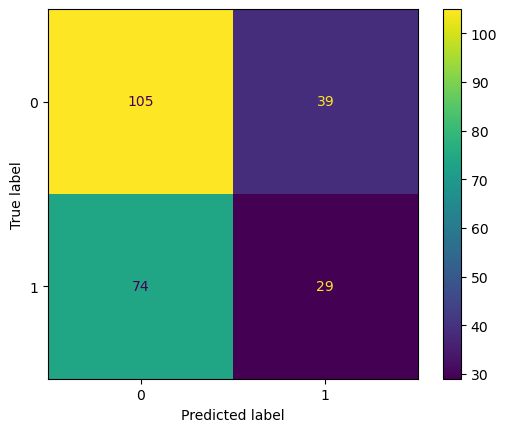

In [54]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

We plot the ROC curve as well.

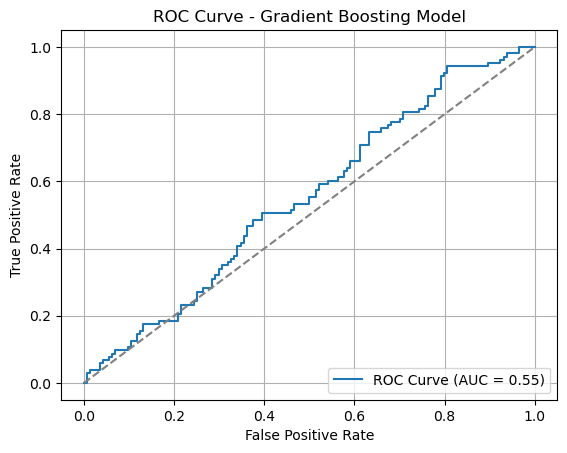

In [57]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_proba = gbr.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

And finally, a classification report. See the attached report for an extended discussion on these results.

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.73      0.65       144
           1       0.43      0.28      0.34       103

    accuracy                           0.54       247
   macro avg       0.51      0.51      0.49       247
weighted avg       0.52      0.54      0.52       247



### Hyperparameter Tuning

As seen in the Python labs, we split the time series to cross-validate and perform a grid search to look for the parameters that yield the highest recall.

In [59]:
tscv = TimeSeriesSplit(n_splits=5, gap=1)

param_grid = {'n_estimators': [50, 100, 150, 200, 250], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4], 'max_depth': [2, 3, 4, 5, 6]}

gbc = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=tscv, scoring='recall', n_jobs=-1, verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=TimeSeriesSplit(gap=1, max_train_size=None, n_splits=5, test_size=None),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='recall', verbose=1)

The best parameters are found to be

In [67]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

{'learning_rate': 0.4, 'max_depth': 3, 'n_estimators': 50}


The best recall score achieved is

In [68]:
y_pred_best = best_model.predict(X_test)
recall_best = recall_score(y_test, y_pred_best)
print(recall_best)

0.34951456310679613


We plot the confusion matrix

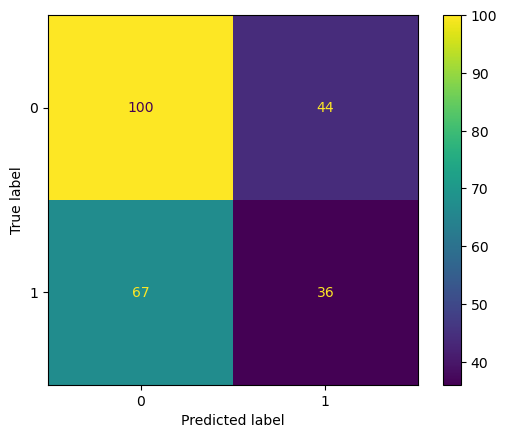

In [64]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_best)).plot()

We display the ROC curve and find the area under the curve

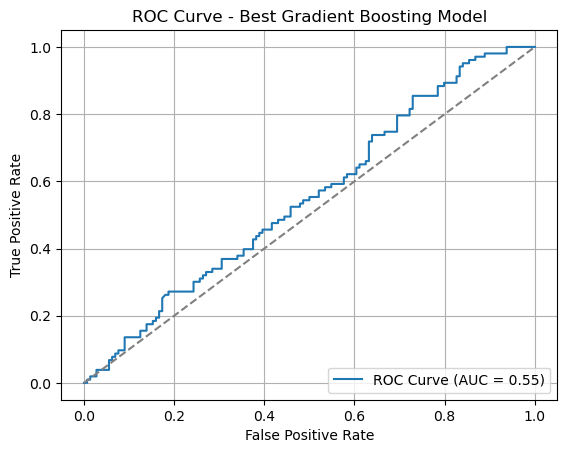

In [69]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Best Gradient Boosting Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

And finally, we print a classification report.

In [66]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64       144
           1       0.45      0.35      0.39       103

    accuracy                           0.55       247
   macro avg       0.52      0.52      0.52       247
weighted avg       0.54      0.55      0.54       247



### Backtesting

In [71]:
csu["Signal"] = best_model.predict(X3)

In [73]:
latest_price = csu["Close"].iloc[-1]

In [113]:
csu["gains"] = (latest_price)*csu["Signal"]
csu["investment"] = csu["Signal"]*csu["Close"] 

In [114]:
total_gains = csu["gains"].sum()
total_investment = csu["investment"].sum()
(total_gains + total_investment)/total_investment

2.87848147960619

In [122]:
csu["gains"] = (latest_price- csu["Signal"]*csu["Close"])*csu["Signal"]
csu["investment"] = csu["Signal"]*csu["Close"] 

In [123]:
total_gains = csu["gains"].sum()
total_investment = csu["investment"].sum()
(total_gains + total_investment)/total_investment

1.8784814796061904

In [139]:
buy_signals = csu["Signal"].value_counts()[1]
hold_signals = csu["Signal"].value_counts()[0]
csu["Rand signal"] = np.random.binomial(1, buy_signals/(buy_signals+hold_signals), len(csu))
csu["random investment"] = csu["Rand signal"]*csu["Close"]
csu["random gains"] =  (latest_price - csu["Rand signal"]*csu["Close"])*csu["Rand signal"]
total_gains = csu["random gains"].sum()
total_investment = csu["random investment"].sum()
(total_gains + total_investment)/total_investment

1.8904720194969027